<a href="https://colab.research.google.com/github/sunyingjian/study-tensorflow/blob/master/%E5%8D%AB%E6%98%9F%E5%9B%BE%E5%83%8F%E8%AF%86%E5%88%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/dataset"
os.chdir(path)
os.listdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['2_class']

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print('tensorflow:',format(tf.__version__))
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib

TensorFlow 2.x selected.
tensorflow: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Using TensorFlow backend.


In [0]:
data_dir='/content/drive/My Drive/dataset/2_class'

In [0]:
data_root=pathlib.Path(data_dir)

In [5]:
for item in data_root.iterdir():
  print(item)

/content/drive/My Drive/dataset/2_class/airplane
/content/drive/My Drive/dataset/2_class/lake


In [0]:
all_image_path=list(data_root.glob('*/*'))

In [7]:
len(all_image_path)

1400

In [8]:
all_image_path=[str(path) for path in all_image_path]
all_image_path[10:12]

['/content/drive/My Drive/dataset/2_class/airplane/airplane_012.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_013.jpg']

In [0]:
import random
random.shuffle(all_image_path)

In [0]:
image_count=len(all_image_path)

In [11]:
label_names=sorted(item.name for item in data_root.glob('*/'))
label_names

['airplane', 'lake']

In [12]:
label_to_index=dict((name,index) for index,name in enumerate(label_names))
label_to_index

{'airplane': 0, 'lake': 1}

In [13]:
#获取路径来实现对图片做标签,通过下面的代码生成一个pathlib对象,那么他的上一层目录就剩他的label
pathlib.Path('/content/drive/My Drive/dataset/2_class/airplane/airplane_012.jpg').parent.name

'airplane'

In [0]:
#通过推导式 labe_to_index得到分组的编号
all_image_labe=[label_to_index[pathlib.Path(p).parent.name]for p in all_image_path]

In [15]:
all_image_labe[:5]

[0, 0, 1, 1, 0]

In [16]:
all_image_path[:5]

['/content/drive/My Drive/dataset/2_class/airplane/airplane_617.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_090.jpg',
 '/content/drive/My Drive/dataset/2_class/lake/lake_553.jpg',
 '/content/drive/My Drive/dataset/2_class/lake/lake_412.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_535.jpg']

In [0]:
import IPython.display as display
index_to_label=dict((v,k) for k,v in label_to_index.items())
#这样我们就可以通过这个字典获取到 

#真正的代码从下面开始

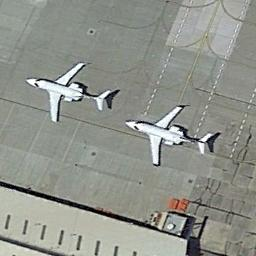

airplane



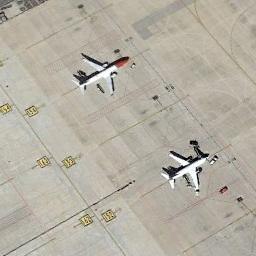

airplane



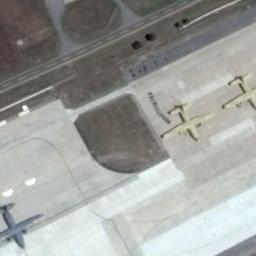

airplane



In [18]:
for n in range(3):
  image_index=random.choice(range(len(all_image_path)))
  display.display(display.Image(all_image_path[image_index]))
  print(index_to_label[all_image_labe[image_index]])
  print()

#单张图片的处理过程
##读取图片

In [19]:
#根据路径，读取图片
img_path=all_image_path[0]
img_path
img_raw=tf.io.read_file(img_path)#读取图片
img_raw

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

##解码图片

In [20]:
#解码图片
image_tensor=tf.image.decode_jpeg(img_raw,channels=3)
image_tensor=tf.image.resize(image_tensor,[256,256])
image_tensor

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[129., 128., 124.],
        [119., 118., 114.],
        [125., 124., 120.],
        ...,
        [104.,  96.,  94.],
        [108.,  96.,  96.],
        [109.,  97.,  97.]],

       [[130., 129., 125.],
        [119., 118., 114.],
        [120., 119., 115.],
        ...,
        [107.,  99.,  97.],
        [110., 100.,  99.],
        [113., 101., 101.]],

       [[133., 129., 126.],
        [123., 119., 116.],
        [115., 111., 108.],
        ...,
        [107.,  99.,  97.],
        [111., 101., 100.],
        [114., 104., 103.]],

       ...,

       [[137., 131., 119.],
        [137., 131., 119.],
        [136., 130., 118.],
        ...,
        [149., 142., 132.],
        [149., 142., 132.],
        [149., 142., 132.]],

       [[138., 132., 120.],
        [139., 133., 121.],
        [139., 133., 121.],
        ...,
        [149., 142., 132.],
        [149., 142., 132.],
        [149., 142., 132.]],

       [[139., 13

##转换数据类型

In [21]:
image_tensor=tf.cast(image_tensor,tf.float32)#转换数据类型
#图片标准化处理
image_tensor=image_tensor/255
#我们查看下这个图片,看到底是不是范围是0-1
image_tensor.numpy().max()
image_tensor.numpy().min()

0.0

以上呢，是对单一图片的整个处理方式：

1. 读取这张图片

2. 对图片进行解码

3. 转换图片数据类型与标准化


接下来，我们写一个函数来对整个图片数据集进行处理：

In [0]:
def load_preprosess_image(image_path):
  img_raw=tf.io.read_file(img_path)#读取路径
  image_tensor=tf.image.decode_jpeg(img_raw,channels=3)#解码图片,3代表解析的是彩色图片
  image_tensor=tf.image.resize(image_tensor,size=[256,256])#图片可能会变形,告诉tensorflow大小是256×256
  image_tensor=tf.cast(image_tensor,tf.float32)#转换数据类型
  image_tensor=image_tensor/255#标准化操作
  return image_tensor #返回处理结果

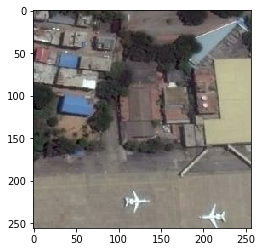

In [23]:
image_path_test=all_image_path[100]
plt.imshow(load_preprosess_image(image_path_test))#调用并画出来

##构造tf.data

In [24]:
path_ds=tf.data.Dataset.from_tensor_slices(all_image_path)
image_dataset=path_ds.map(load_preprosess_image)#建造数据集
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [0]:
#对image_dataset的类型进行转换，我们知道他的图片格式是256×256×3
#为什么他没有显示出来呢

##构造label

In [0]:
label_dataset=tf.data.Dataset.from_tensor_slices(all_image_labe)

##测试下标签

In [27]:
for label in label_dataset:
  print(label)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype

In [28]:
#合并数据
dataset=tf.data.Dataset.zip((image_dataset,label_dataset))
#我们是以元组的形式进行zip的
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [0]:
#划分train与test数据
test_count=int(image_count*0.2)
#必须是个整数所以我们加int
train_count=image_count-test_count

In [0]:
train_dataset=dataset.skip(test_count)
#skip就是掠过的意思
#得到train_dataset的个数
test_dataset=dataset.take(test_count)
#take就是取的意思

In [31]:
BATCH_SIZE=32
train_dataset=train_dataset.shuffle(buffer_size=train_count)
train_dataset=train_dataset.batch(BATCH_SIZE)
train_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),
                 input_shape=(256,256,3),
                 activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(1024,(3,3),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0

In [0]:
#编译模型
model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['acc'] )

##确定epoch的数量

所以我们要告诉他一个batch是多少步所以要这么算，
这样告诉模型我们训练要多少个epoch

In [0]:
steps_per_epoch=train_count//BATCH_SIZE
validation_steps=test_count//BATCH_SIZE

##运行模型

In [36]:
history=model.fit(train_dataset,epochs=30,steps_per_epoch=steps_per_epoch)

Train for 35 steps
Epoch 1/30
35/35 [==============================] - 43s 1s/step - loss: 1.0038 - acc: 0.4812
Epoch 2/30
 0/35 [..............................] - ETA: 0s

ValueError: ignored